In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexPie/'

In [3]:
final_df=pd.read_csv('ComplexPie_MS_PerStep.csv')

In [4]:
filtered_putpieinoven = final_df[final_df['Step'].str.strip() == 'Put pie in oven']
filtered_putpieinoven

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
9,C001,36,Put pie in oven,417.705357,646.987973,521.009879,508.300452,499.222944,1049.358871,0.000000,0.000000
20,C003,58,Put pie in oven,281.770756,556.204339,681.118664,554.932002,732.631683,1029.531151,733.825350,632.000105
31,C006,42,Put pie in oven,0.000000,531.163977,0.000000,0.000000,435.572246,1020.632468,0.000000,0.000000
42,C008,34,Put pie in oven,603.364727,736.761957,872.864373,780.591941,913.534534,1202.199385,1025.486016,813.726620
53,C009,24,Put pie in oven,422.700850,583.094933,511.312859,504.001243,484.500992,991.293627,864.452598,701.028237
64,C012,54,Put pie in oven,356.439951,520.127953,723.208582,1187.815747,726.640857,999.174014,842.490863,653.529576
75,C013,48,Put pie in oven,499.460239,581.057959,800.624237,696.579945,940.653910,705.820080,553.620321,511.271771
86,C016,39,Put pie in oven,349.899765,536.055596,553.257403,558.230081,612.744848,686.498503,583.915187,531.949303
97,C017,36,Put pie in oven,439.842838,746.275844,605.319388,620.194841,589.137933,1236.095334,1052.772652,828.146880
108,C020,30,Put pie in oven,451.628664,683.672269,675.585022,605.370138,812.254054,1045.051381,912.612955,739.177843


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_putpieinoven = filtered_putpieinoven.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_putpieinoven.select_dtypes(include=['float64', 'int64']).columns
filtered_putpieinoven[numerical_cols] = filtered_putpieinoven[numerical_cols].replace(0, np.nan)

filtered_putpieinoven[numerical_cols] = imputer.fit_transform(filtered_putpieinoven[numerical_cols])
filtered_putpieinoven

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
9,C001,36.0,Put pie in oven,417.705357,646.987973,521.009879,508.300452,499.222944,1049.358871,864.452598,701.028237
20,C003,58.0,Put pie in oven,281.770756,556.204339,681.118664,554.932002,732.631683,1029.531151,733.825350,632.000105
31,C006,42.0,Put pie in oven,422.700850,531.163977,511.312859,504.001243,435.572246,1020.632468,864.452598,701.028237
42,C008,34.0,Put pie in oven,603.364727,736.761957,872.864373,780.591941,913.534534,1202.199385,1025.486016,813.726620
53,C009,24.0,Put pie in oven,422.700850,583.094933,511.312859,504.001243,484.500992,991.293627,864.452598,701.028237
64,C012,54.0,Put pie in oven,356.439951,520.127953,723.208582,1187.815747,726.640857,999.174014,842.490863,653.529576
75,C013,48.0,Put pie in oven,499.460239,581.057959,800.624237,696.579945,940.653910,705.820080,553.620321,511.271771
86,C016,39.0,Put pie in oven,349.899765,536.055596,553.257403,558.230081,612.744848,686.498503,583.915187,531.949303
97,C017,36.0,Put pie in oven,439.842838,746.275844,605.319388,620.194841,589.137933,1236.095334,1052.772652,828.146880
108,C020,30.0,Put pie in oven,451.628664,683.672269,675.585022,605.370138,812.254054,1045.051381,912.612955,739.177843


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Pie',
    'HeadCamera Distance': 'HeadCamera Distance - Add Pie',
    'LeftElbow Distance': 'LeftElbow Distance - Add Pie',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Pie',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Pie',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Pie',
    'RightElbow Distance': 'RightElbow Distance - Add Pie',
    'RightShoulder Distance': 'RightShoulder Distance - Add Pie'
}

# Rename columns
filtered_putpieinoven = filtered_putpieinoven.rename(columns=new_column_names)
filtered_putpieinoven

,Participant,Block Design Raw Score,Step,Chest Distance - Add Pie,HeadCamera Distance - Add Pie,LeftElbow Distance - Add Pie,LeftShoulder Distance - Add Pie,MotionControllerLeft Distance - Add Pie,MotionControllerRight Distance - Add Pie,RightElbow Distance - Add Pie,RightShoulder Distance - Add Pie
9,C001,36.0,Put pie in oven,417.705357,646.987973,521.009879,508.300452,499.222944,1049.358871,864.452598,701.028237
20,C003,58.0,Put pie in oven,281.770756,556.204339,681.118664,554.932002,732.631683,1029.531151,733.825350,632.000105
31,C006,42.0,Put pie in oven,422.700850,531.163977,511.312859,504.001243,435.572246,1020.632468,864.452598,701.028237
42,C008,34.0,Put pie in oven,603.364727,736.761957,872.864373,780.591941,913.534534,1202.199385,1025.486016,813.726620
53,C009,24.0,Put pie in oven,422.700850,583.094933,511.312859,504.001243,484.500992,991.293627,864.452598,701.028237
64,C012,54.0,Put pie in oven,356.439951,520.127953,723.208582,1187.815747,726.640857,999.174014,842.490863,653.529576
75,C013,48.0,Put pie in oven,499.460239,581.057959,800.624237,696.579945,940.653910,705.820080,553.620321,511.271771
86,C016,39.0,Put pie in oven,349.899765,536.055596,553.257403,558.230081,612.744848,686.498503,583.915187,531.949303
97,C017,36.0,Put pie in oven,439.842838,746.275844,605.319388,620.194841,589.137933,1236.095334,1052.772652,828.146880
108,C020,30.0,Put pie in oven,451.628664,683.672269,675.585022,605.370138,812.254054,1045.051381,912.612955,739.177843


In [7]:
tracker_columns = ['Chest Distance - Add Pie', 'HeadCamera Distance - Add Pie', 'LeftElbow Distance - Add Pie', 'LeftShoulder Distance - Add Pie',
                   'RightElbow Distance - Add Pie', 'RightShoulder Distance - Add Pie', 'MotionControllerLeft Distance - Add Pie',
                   'MotionControllerRight Distance - Add Pie']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_putpieinoven, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_putpieinoven[block_design_col], filtered_putpieinoven[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_putpieinoven, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Pie,-0.372197,0.171892
1,HeadCamera Distance - Add Pie,-0.379590,0.162867
2,LeftElbow Distance - Add Pie,-0.168459,0.548405
3,LeftShoulder Distance - Add Pie,-0.139785,0.619281
4,RightElbow Distance - Add Pie,-0.294699,0.286307
5,RightShoulder Distance - Add Pie,-0.334232,0.223385
6,MotionControllerLeft Distance - Add Pie,-0.078783,0.780178
7,MotionControllerRight Distance - Add Pie,-0.114593,0.684259


In [8]:
#filtered_putpieinoven.to_csv('ComplexPie_Putpieinoven.csv',index=False)

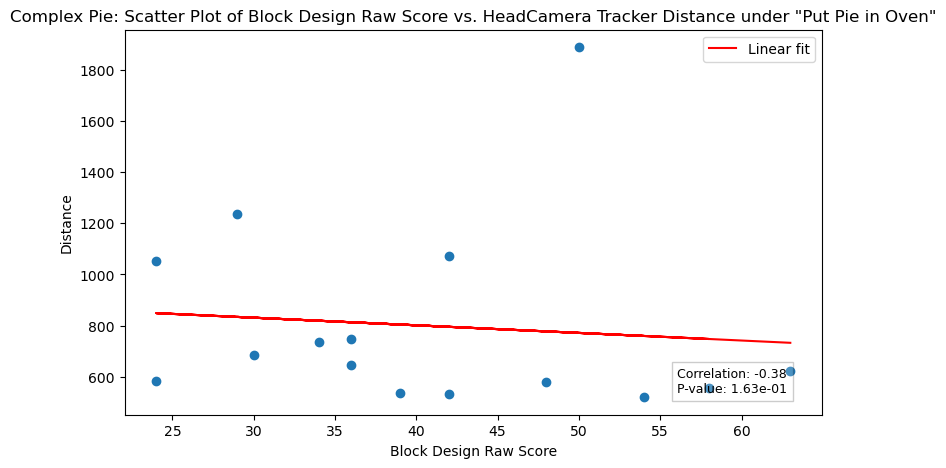

In [19]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['HeadCamera Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['HeadCamera Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['HeadCamera Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '65 CP_PieDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

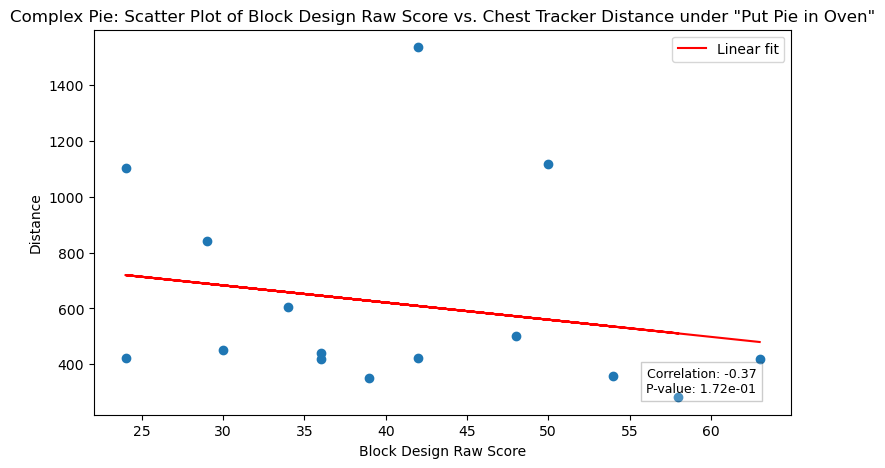

In [10]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['Chest Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['Chest Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['Chest Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '66 CP_PieDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

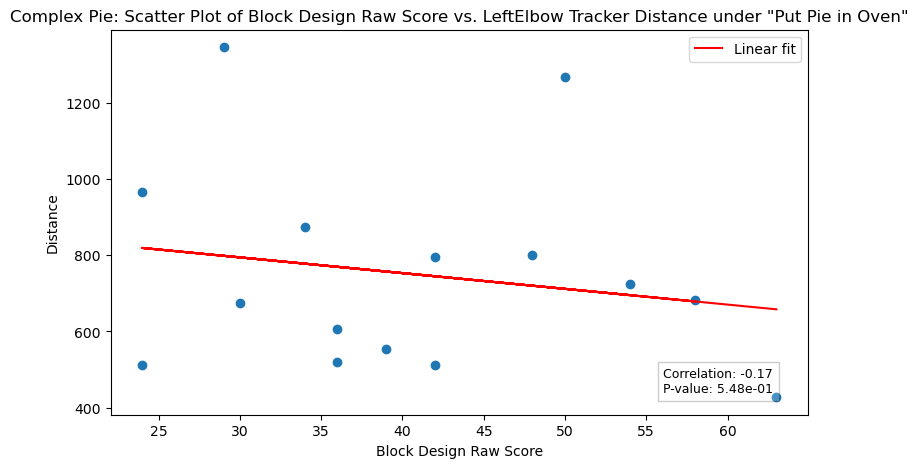

In [11]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftElbow Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftElbow Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftElbow Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '67 CP_PieDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

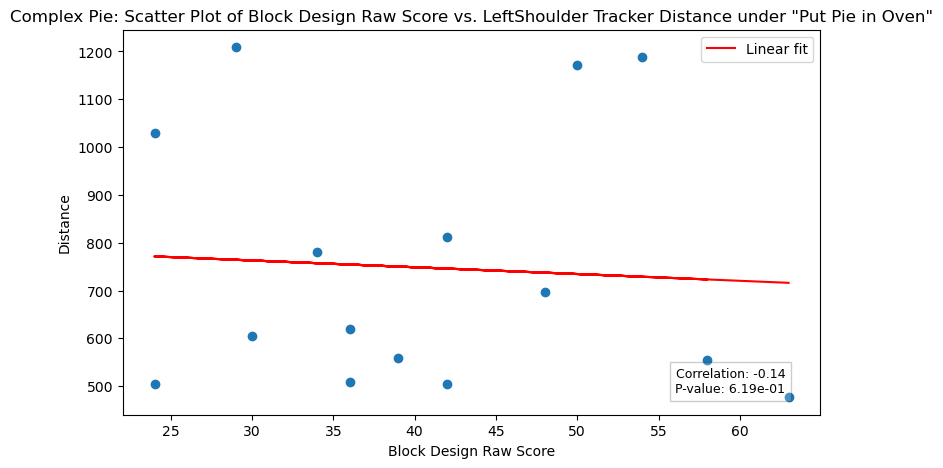

In [12]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftShoulder Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftShoulder Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['LeftShoulder Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '68 CP_PieDistanceLeftShldr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

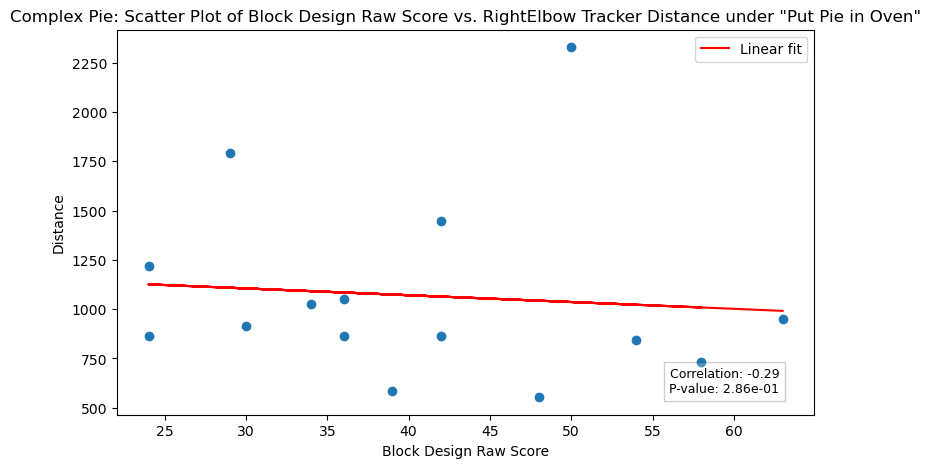

In [13]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightElbow Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightElbow Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightElbow Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '69 CP_PieDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

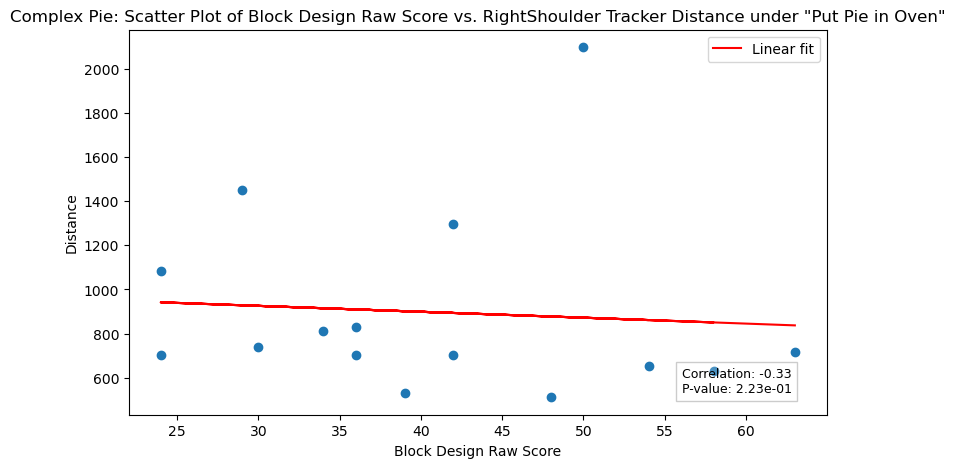

In [15]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightShoulder Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightShoulder Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['RightShoulder Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '70 CP_PieDistanceRightShouldr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

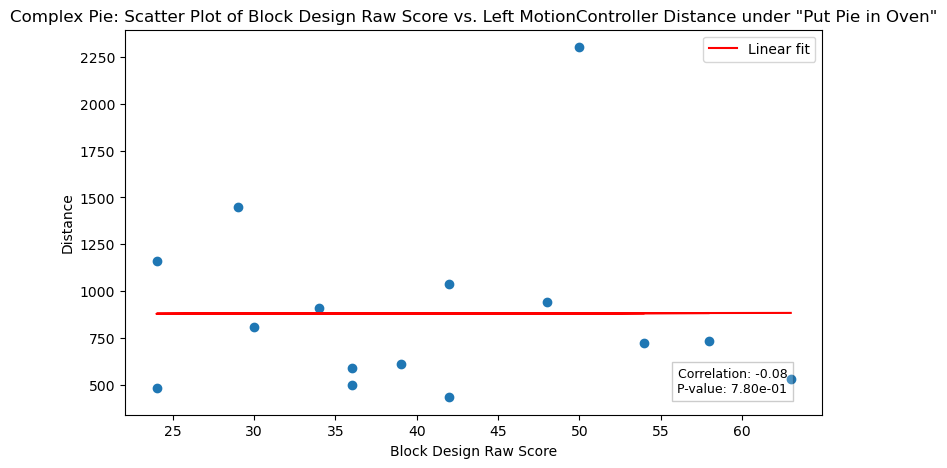

In [16]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerLeft Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerLeft Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerLeft Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '71 CP_PieDistanceLeftControllr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

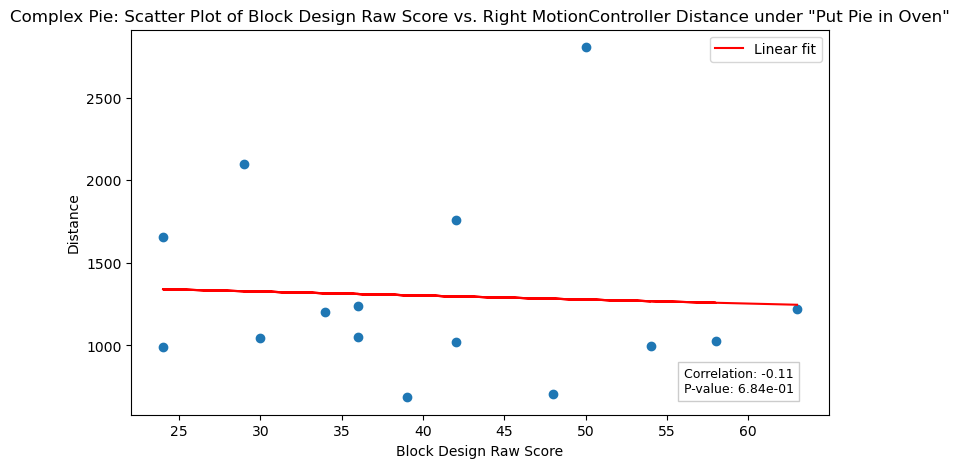

In [17]:
correlation, p_value = spearmanr(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerRight Distance - Add Pie'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerRight Distance - Add Pie'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_putpieinoven['Block Design Raw Score'], filtered_putpieinoven['MotionControllerRight Distance - Add Pie'], 1)
fit_line = slope * filtered_putpieinoven['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_putpieinoven['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Put Pie in Oven"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '72 CP_PieDistanceRightControllr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()